# Project: Investigating the Travel Insurance Dataset

* Table of Contents
* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Conclusions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id='intro'></a>
## Introduction

### Dataset Description 

1. Age (Numeric): the customer’s age. 
2. Employment Type (Character): the sector of employment. 
3. GraduateOrNot (Character): whether the customer is a college graduate.
3. AnnualIncome (Numeric): the customer’s yearly income.
4. FamilyMembers (Numeric): the number of family members living with the customer. 
5. ChronicDiseases (Numeric): whether the customer has any chronic conditions.
6. FrequentFlyer (Character): whether a customer books frequent tickets.
7. EverTravelledAbroad (Character): has the customer ever travelled abroad.
8. TravelInsurance (Numeric): whether the customer bought travel insurance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In [ ]:
travel=pd.read_csv('/content/drive/MyDrive/Data Analyst Professional Certification/travel_insurance.csv')

In [ ]:
travel.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
travel.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [ ]:
travel

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [ ]:
travel.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

## Data Cleaning

In [ ]:
employment=travel['Employment Type'].str.split('/', expand=True)

In [ ]:
type(employment)

pandas.core.frame.DataFrame

In [ ]:
employment.rename(columns={0: 'Employment Sector', 1:'Employment Type'}, inplace=True)

In [ ]:
employment['Employment Type']=np.where(employment['Employment Sector']=='Government Sector', 'Civil Servant', employment['Employment Type'])

In [ ]:
employment

,Employment Sector,Employment Type
0,Government Sector,Civil Servant
1,Private Sector,Self Employed
2,Private Sector,Self Employed
3,Private Sector,Self Employed
4,Private Sector,Self Employed
...,...,...
1982,Private Sector,Self Employed
1983,Private Sector,Self Employed
1984,Private Sector,Self Employed
1985,Private Sector,Self Employed


In [ ]:
employment.isnull().sum()

Employment Sector    0
Employment Type      0
dtype: int64

In [ ]:
travel.drop(columns=['Employment Type'], inplace=True)

In [ ]:
travel.insert(1, 'Employment Sector', employment['Employment Sector'])
travel.insert(2, 'Employment Type', employment['Employment Type'])

In [ ]:
travel.rename(columns={'Employment Sector': 'EmploymentSector', 'Employment Type':'EmploymentType'}, inplace=True)

In [ ]:
travel.head()

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Civil Servant,Yes,400000,6,1,No,No,0
1,31,Private Sector,Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector,Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector,Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector,Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
travel['ChronicDiseases'].replace(0, 'No', inplace=True)
travel['ChronicDiseases'].replace(1, 'Yes', inplace=True)

In [ ]:
travel['EmploymentSector']=travel['EmploymentSector'].astype('category')
travel['EmploymentType']=travel['EmploymentType'].astype('category')
travel['GraduateOrNot']=travel['GraduateOrNot'].astype('category')
travel['FrequentFlyer']=travel['FrequentFlyer'].astype('category')
travel['EverTravelledAbroad']=travel['EverTravelledAbroad'].astype('category')
travel['ChronicDiseases']=travel['ChronicDiseases'].astype('category')

##Statistical Testing Between Variables

In [ ]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(travel['AnnualIncome'], travel['TravelInsurance'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.397, p=0.000
Probably dependent


In [ ]:

# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
stat, p = spearmanr(travel['AnnualIncome'], travel['TravelInsurance'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
 
 
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
stat1, p1 = kendalltau(travel['AnnualIncome'], travel['TravelInsurance'])
print('stat=%.3f, p=%.3f' % (stat1, p1))
if p1 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.398, p=0.000
Probably dependent
stat=0.332, p=0.000
Probably dependent


In [ ]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(travel['Age'], travel['TravelInsurance'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
 

# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
stat1, p1 = spearmanr(travel['Age'], travel['TravelInsurance'])
print('stat=%.3f, p=%.3f' % (stat1, p1))
if p1 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
 
 
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
stat2, p2 = kendalltau(travel['Age'], travel['TravelInsurance'])
print('stat=%.3f, p=%.3f' % (stat2, p2))
if p2 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.061, p=0.006
Probably dependent
stat=0.048, p=0.031
Probably dependent
stat=0.042, p=0.031
Probably dependent


In [ ]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(travel['FamilyMembers'], travel['TravelInsurance'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
 

# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
stat1, p1 = spearmanr(travel['FamilyMembers'], travel['TravelInsurance'])
print('stat=%.3f, p=%.3f' % (stat1, p1))
if p1 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
 
 
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
stat2, p2 = kendalltau(travel['FamilyMembers'], travel['TravelInsurance'])
print('stat=%.3f, p=%.3f' % (stat2, p2))
if p2 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.080, p=0.000
Probably dependent
stat=0.075, p=0.001
Probably dependent
stat=0.066, p=0.001
Probably dependent


In [ ]:
categorical_col=travel[['ChronicDiseases', 'GraduateOrNot',  'EmploymentSector', 'EmploymentType',
                       'FrequentFlyer', 'EverTravelledAbroad']]

import statsmodels.api as sm
from statsmodels.formula.api import ols
 
for x in categorical_col:
    model = ols('TravelInsurance' + '~' + x, data = travel).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                     df      sum_sq   mean_sq         F    PR(>F)
ChronicDiseases     1.0    0.150973  0.150973  0.656978  0.417726
Residual         1985.0  456.149984  0.229798       NaN       NaN
                   df      sum_sq   mean_sq         F    PR(>F)
GraduateOrNot     1.0    0.163574  0.163574  0.711834  0.398937
Residual       1985.0  456.137382  0.229792       NaN       NaN
                      df      sum_sq   mean_sq          F        PR(>F)
EmploymentSector     1.0    9.974148  9.974148  44.359162  3.527704e-11
Residual          1985.0  446.326809  0.224850        NaN           NaN
                    df      sum_sq   mean_sq          F        PR(>F)
EmploymentType     1.0    9.974148  9.974148  44.359162  3.527704e-11
Residual        1985.0  446.326809  0.224850        NaN           NaN
                   df      sum_sq    mean_sq           F        PR(>F)
FrequentFlyer     1.0   24.581772  24.581772  113.024434  1.032551e-25
Residual       1985.0  431.719185   0.2174

####Analysis to confirm the ANOVA test results

In [ ]:
crosstab=pd.crosstab(index=travel['EmploymentSector'], columns=travel['TravelInsurance'])
print(crosstab)

TravelInsurance      0    1
EmploymentSector           
Government Sector  430  140
Private Sector     847  570


In [ ]:
from scipy.stats import chi2_contingency

Chiresult=chi2_contingency(crosstab)

print('The P-Value of the ChiSq Test is:', Chiresult[1])

The P-Value of the ChiSq Test is: 6.208106601512192e-11


**H0: The variables are not correlated with each other. This is the H0 used in the Chi-square test.**

**In the above code, the P-value came lower than 0.05. Hence H0 will be rejected. Which means the variables are correlated with each other**

In [ ]:
crosstab1=pd.crosstab(index=travel['ChronicDiseases'], columns=travel['TravelInsurance'])
print(crosstab1)

from scipy.stats import chi2_contingency

Chiresult1=chi2_contingency(crosstab1)

print('The P-Value of the ChiSq Test is:', Chiresult1[1])

TravelInsurance    0    1
ChronicDiseases          
No               930  505
Yes              347  205
The P-Value of the ChiSq Test is: 0.4481165216392011


**In the above code, the P-value came higher than 0.05. Hence H0 will be accepted. Which means the variables are not correlated with each other**

In [ ]:
crosstab2=pd.crosstab(index=travel['GraduateOrNot'], columns=travel['TravelInsurance'])
print(crosstab1)

from scipy.stats import chi2_contingency

Chiresult2=chi2_contingency(crosstab2)

print('The P-Value of the ChiSq Test is:', Chiresult2[1])

TravelInsurance    0    1
ChronicDiseases          
No               930  505
Yes              347  205
The P-Value of the ChiSq Test is: 0.4364833842842336


**In the above code, the P-value came higher than 0.05. Hence H0 will be accepted. Which means the variables are not correlated with each other**

In [ ]:
crosstab3=pd.crosstab(index=travel['FrequentFlyer'], columns=travel['TravelInsurance'])
print(crosstab3)

from scipy.stats import chi2_contingency

Chiresult3=chi2_contingency(crosstab3)

print('The P-Value of the ChiSq Test is:', Chiresult3[1])

TravelInsurance     0    1
FrequentFlyer             
No               1099  471
Yes               178  239
The P-Value of the ChiSq Test is: 7.92436041506454e-25


**In the above code, the P-value came lower than 0.05. Hence H0 will be rejected. Which means the variables are correlated with each other**

In [ ]:
crosstab4=pd.crosstab(index=travel['EverTravelledAbroad'], columns=travel['TravelInsurance'])
print(crosstab4)

from scipy.stats import chi2_contingency

Chiresult4=chi2_contingency(crosstab4)

print('The P-Value of the ChiSq Test is:', Chiresult4[1])

TravelInsurance         0    1
EverTravelledAbroad           
No                   1195  412
Yes                    82  298
The P-Value of the ChiSq Test is: 1.4134505859999571e-82


**In the above code, the P-value came lower than 0.05. Hence H0 will be rejected. Which means the variables are correlated with each other**

In [ ]:
travel.corr()

,Age,AnnualIncome,FamilyMembers,TravelInsurance
Age,1.000000,-0.020101,0.027409,0.061060
AnnualIncome,-0.020101,1.000000,-0.015367,0.396763
FamilyMembers,0.027409,-0.015367,1.000000,0.079909
TravelInsurance,0.061060,0.396763,0.079909,1.000000


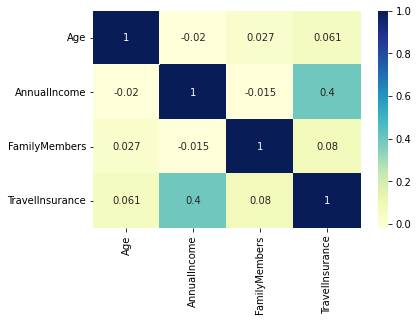

In [ ]:
dataplot = sns.heatmap(travel.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

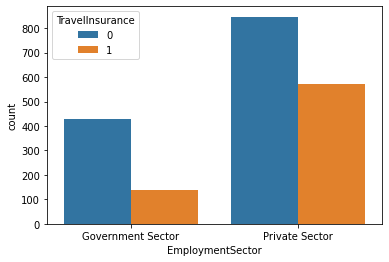

In [ ]:
sns.countplot(data = travel, x = 'EmploymentSector', hue = 'TravelInsurance')

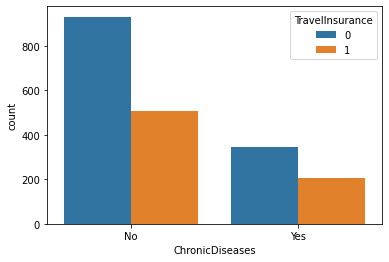

In [ ]:
sns.countplot(data = travel, x = 'ChronicDiseases', hue = 'TravelInsurance')

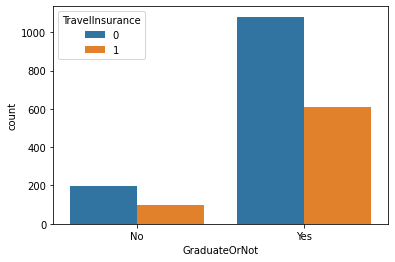

In [ ]:
sns.countplot(data = travel, x = 'GraduateOrNot', hue = 'TravelInsurance')

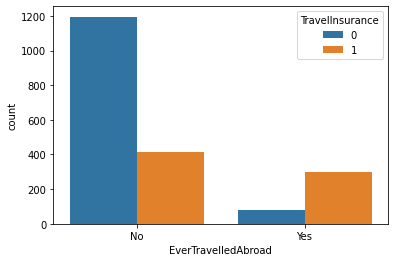

In [ ]:
sns.countplot(data = travel, x = 'EverTravelledAbroad', hue = 'TravelInsurance')

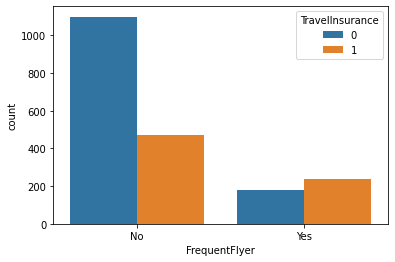

In [ ]:
sns.countplot(data = travel, x = 'FrequentFlyer', hue = 'TravelInsurance')

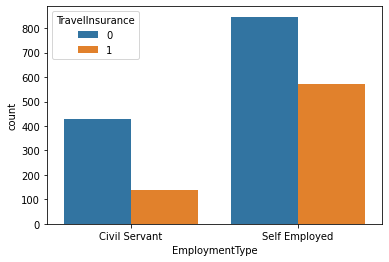

In [ ]:
sns.countplot(data = travel, x = 'EmploymentType', hue = 'TravelInsurance')

**All the statistical analysis and tests that have been done above show that "AnnualIncome", "Age", "FamilyMembers", "EmployeeSector", "EmployeeType", "FrequentFlyer", "EverTravelledAbroad" columns are correlated with the "TravelInsurance" column i.e they contribute largely to the values in the column, therefore most of the analysis will be around these columns.**

##DATA ANALYSIS

In [ ]:
customers=travel.loc[travel['TravelInsurance']>0]

In [ ]:
customers

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
2,34,Private Sector,Self Employed,Yes,500000,4,Yes,No,No,1
7,31,Private Sector,Self Employed,Yes,1350000,3,No,Yes,Yes,1
8,28,Private Sector,Self Employed,Yes,1450000,6,Yes,Yes,Yes,1
11,26,Private Sector,Self Employed,Yes,1400000,5,No,Yes,Yes,1
12,32,Government Sector,Civil Servant,Yes,850000,6,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...
1977,25,Private Sector,Self Employed,No,1350000,6,No,No,Yes,1
1978,34,Private Sector,Self Employed,Yes,700000,5,No,No,No,1
1981,27,Government Sector,Civil Servant,Yes,850000,3,No,No,No,1
1982,33,Private Sector,Self Employed,Yes,1500000,4,No,Yes,Yes,1


In [ ]:
non_customers=travel.loc[travel['TravelInsurance']==0]

In [ ]:
non_customers

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Civil Servant,Yes,400000,6,Yes,No,No,0
1,31,Private Sector,Self Employed,Yes,1250000,7,No,No,No,0
3,28,Private Sector,Self Employed,Yes,700000,3,Yes,No,No,0
4,28,Private Sector,Self Employed,Yes,700000,8,Yes,Yes,No,0
5,25,Private Sector,Self Employed,No,1150000,4,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...
1979,28,Private Sector,Self Employed,Yes,1100000,4,Yes,No,No,0
1980,25,Private Sector,Self Employed,No,1150000,5,Yes,No,No,0
1983,28,Private Sector,Self Employed,Yes,1750000,5,Yes,No,Yes,0
1984,28,Private Sector,Self Employed,Yes,1150000,6,Yes,No,No,0


##ANALYSIS FOR CUSTOMERS AND NON-CUSTOMERS WHO TRAVEL FREQUENTLY AND TRAVEL ABROAD

In [ ]:
def valcount(tablename,columnname):
    print(tablename[columnname].value_counts())

In [ ]:
customercolumns=customers.columns

for column in customercolumns:
    print(valcount(customers, column))

34    133
28    105
25     92
33     78
31     75
26     74
29     51
30     28
35     28
27     27
32     19
Name: Age, dtype: int64
None
Private Sector       570
Government Sector    140
Name: EmploymentSector, dtype: int64
None
Self Employed    570
Civil Servant    140
Name: EmploymentType, dtype: int64
None
Yes    611
No      99
Name: GraduateOrNot, dtype: int64
None
1400000    119
1500000     79
800000      41
1350000     41
500000      35
1300000     35
1700000     33
1450000     31
700000      30
1100000     28
1200000     26
1050000     26
550000      23
1000000     19
600000      19
900000      16
1150000     13
1250000     13
750000      13
850000      13
650000      11
400000      10
300000       6
950000       6
450000       5
1550000      5
1750000      4
350000       4
1800000      4
1650000      2
Name: AnnualIncome, dtype: int64
None
4    160
3    135
5    131
6    129
7     81
2     27
9     26
8     21
Name: FamilyMembers, dtype: int64
None
No     505
Yes    205
Name:

In [ ]:
noncustomercolumns=non_customers.columns

for column in noncustomercolumns:
    print(valcount(non_customers,column))

28    401
31    159
29    141
34    133
27    104
26     74
32     72
33     70
25     54
30     37
35     32
Name: Age, dtype: int64
None
Private Sector       847
Government Sector    430
Name: EmploymentSector, dtype: int64
None
Self Employed    847
Civil Servant    430
Name: EmploymentType, dtype: int64
None
Yes    1081
No      196
Name: GraduateOrNot, dtype: int64
None
800000     112
500000     108
1200000     86
300000      82
1100000     79
600000      79
1150000     66
700000      65
550000      58
1250000     58
1300000     56
900000      56
1050000     56
400000      55
750000      52
350000      51
850000      42
1000000     41
650000      19
950000      15
1750000     11
1400000     11
450000      10
1700000      4
1500000      3
1350000      2
Name: AnnualIncome, dtype: int64
None
4    345
5    295
3    242
6    165
7     97
2     66
8     38
9     29
Name: FamilyMembers, dtype: int64
None
No     930
Yes    347
Name: ChronicDiseases, dtype: int64
None
No     1099
Yes     17

In [ ]:
twenties=range(20, 30)
thirties=range(30, 40)

In [ ]:
customers.groupby('AnnualIncome').count()

,Age,EmploymentSector,EmploymentType,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
AnnualIncome,,,,,,,,,
300000,6,6,6,6,6,6,6,6,6
350000,4,4,4,4,4,4,4,4,4
400000,10,10,10,10,10,10,10,10,10
450000,5,5,5,5,5,5,5,5,5
500000,35,35,35,35,35,35,35,35,35
550000,23,23,23,23,23,23,23,23,23
600000,19,19,19,19,19,19,19,19,19
650000,11,11,11,11,11,11,11,11,11
700000,30,30,30,30,30,30,30,30,30


In [ ]:
non_customers.groupby('AnnualIncome').count()

,Age,EmploymentSector,EmploymentType,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
AnnualIncome,,,,,,,,,
300000,82,82,82,82,82,82,82,82,82
350000,51,51,51,51,51,51,51,51,51
400000,55,55,55,55,55,55,55,55,55
450000,10,10,10,10,10,10,10,10,10
500000,108,108,108,108,108,108,108,108,108
550000,58,58,58,58,58,58,58,58,58
600000,79,79,79,79,79,79,79,79,79
650000,19,19,19,19,19,19,19,19,19
700000,65,65,65,65,65,65,65,65,65


In [ ]:
import plotly.express as px

fig=px.histogram(data_frame = customers
             ,x = 'AnnualIncome'
             ,nbins = 30,
             color='EverTravelledAbroad'
             )

fig.show()

In [ ]:
import plotly.express as px

fig=px.histogram(data_frame = non_customers
             ,x = 'AnnualIncome'
             ,nbins = 30,
             color='EverTravelledAbroad'
             )

fig.show()

In [ ]:
customers['AgeGroup']=np.where(customers['Age']<30, 'Twenties', 'Thirties')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
customers.head()

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AgeGroup
2,34,Private Sector,Self Employed,Yes,500000,4,Yes,No,No,1,Thirties
7,31,Private Sector,Self Employed,Yes,1350000,3,No,Yes,Yes,1,Thirties
8,28,Private Sector,Self Employed,Yes,1450000,6,Yes,Yes,Yes,1,Twenties
11,26,Private Sector,Self Employed,Yes,1400000,5,No,Yes,Yes,1,Twenties
12,32,Government Sector,Civil Servant,Yes,850000,6,No,No,No,1,Thirties


In [ ]:
non_customers['AgeGroup']=np.where(non_customers['Age']<30, 'Twenties', 'Thirties')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
customers.groupby('AgeGroup').count()

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
AgeGroup,,,,,,,,,,
Thirties,361,361,361,361,361,361,361,361,361,361
Twenties,349,349,349,349,349,349,349,349,349,349


In [ ]:
non_customers.groupby('AgeGroup').count()

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
AgeGroup,,,,,,,,,,
Thirties,503,503,503,503,503,503,503,503,503,503
Twenties,774,774,774,774,774,774,774,774,774,774


In [ ]:
fig=px.pie(data_frame = customers
             ,values=valcount(customers, 'AgeGroup'), names='AgeGroup', title='Customers Age Group Pie Chart'
             )

fig.show()

Thirties    361
Twenties    349
Name: AgeGroup, dtype: int64


In [ ]:
fig=px.pie(data_frame = non_customers
             ,values=valcount(non_customers, 'AgeGroup'), names='AgeGroup', 
           title='Non Customers Age Group Pie Chart'
             )

fig.show()

Twenties    774
Thirties    503
Name: AgeGroup, dtype: int64


In [ ]:
fig = px.scatter(customers, 
    x=customers.groupby('FamilyMembers')['FamilyMembers'].count().index, 
    y=customers.groupby('FamilyMembers')['FamilyMembers'].count().values,
	size=customers.groupby('FamilyMembers')['FamilyMembers'].count().values, 
  color=customers.groupby('FamilyMembers')['FamilyMembers'].count().index,#Third Parameter
     size_max=60)

fig.show()

In [ ]:
fig = px.scatter(non_customers, 
    x=non_customers.groupby('FamilyMembers')['FamilyMembers'].count().index, 
    y=non_customers.groupby('FamilyMembers')['FamilyMembers'].count().values,
	size=non_customers.groupby('FamilyMembers')['FamilyMembers'].count().values, 
  color=non_customers.groupby('FamilyMembers')['FamilyMembers'].count().index,#Third Parameter
     size_max=60)

fig.show()

**There is somethiyng going on in the chart below, in order to have a closer look, family members will be grouped**

In [ ]:
non_customers['FamilyGroup']=np.where(non_customers['FamilyMembers']<=5, 'Standard', 'High')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
customers['FamilyGroup']=np.where(customers['FamilyMembers']<=5, 'Standard', 'High')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig=px.pie(data_frame = customers
             ,values=valcount(customers, 'FamilyGroup'), names='FamilyGroup',
            title='Customers Family Group Pie Chart'
             )

fig.show()

Standard    453
High        257
Name: FamilyGroup, dtype: int64


In [ ]:
fig=px.pie(data_frame = non_customers
             ,values=valcount(non_customers, 'FamilyGroup'), names='FamilyGroup',
            title='Non Customers Family Group Pie Chart'
             )

fig.show()

Standard    948
High        329
Name: FamilyGroup, dtype: int64


In [ ]:
(customers.groupby(['FrequentFlyer']).count()/len(customers))*100

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,EverTravelledAbroad,TravelInsurance,AgeGroup,FamilyGroup
FrequentFlyer,,,,,,,,,,,
No,66.338028,66.338028,66.338028,66.338028,66.338028,66.338028,66.338028,66.338028,66.338028,66.338028,66.338028
Yes,33.661972,33.661972,33.661972,33.661972,33.661972,33.661972,33.661972,33.661972,33.661972,33.661972,33.661972


In [ ]:
(customers.groupby('FrequentFlyer')['FrequentFlyer'].count()/len(customers))*100

FrequentFlyer
No     66.338028
Yes    33.661972
Name: FrequentFlyer, dtype: float64

In [ ]:
((customers.groupby('FrequentFlyer')['FrequentFlyer'].count()/len(customers))*100).index

CategoricalIndex(['No', 'Yes'], categories=['No', 'Yes'], ordered=False, dtype='category', name='FrequentFlyer')

In [ ]:
import plotly.graph_objects as go

fig7 = go.Figure(data = go.Pie(values = ((customers.groupby('FrequentFlyer')['FrequentFlyer'].count()/len(customers))*100).values, 
                               labels = ((customers.groupby('FrequentFlyer')['FrequentFlyer'].count()/len(customers))*100).index,
                               hole = 0.6,
                               pull = [0,0.25,0,0],
                               marker_colors = ['cyan', 'blue']))
fig7.update_traces(hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)
fig7.update_layout(
                   title_text = 'Percentage of Customers who travel frequently',
                   title_font = dict(size=25,family='Verdana', 
                                     color='darkred'))
fig7.add_annotation(x= 0.5, y = 0.5,
                    text = 'FrequentFlyer',
                    font = dict(size=18,family='Verdana', 
                                color='black'),
                    showarrow = False)
fig7.show()

In [ ]:
(non_customers.groupby(['FrequentFlyer']).count()/len(non_customers))*100

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,EverTravelledAbroad,TravelInsurance,AgeGroup,FamilyGroup
FrequentFlyer,,,,,,,,,,,
No,86.061081,86.061081,86.061081,86.061081,86.061081,86.061081,86.061081,86.061081,86.061081,86.061081,86.061081
Yes,13.938919,13.938919,13.938919,13.938919,13.938919,13.938919,13.938919,13.938919,13.938919,13.938919,13.938919


In [ ]:
import plotly.graph_objects as go

fig7 = go.Figure(data = go.Pie(values = ((non_customers.groupby('FrequentFlyer')['FrequentFlyer'].count()
/len(non_customers))*100).values, 
                               labels = ((non_customers.groupby('FrequentFlyer')['FrequentFlyer'].count()
                               /len(non_customers))*100).index,
                               hole = 0.6,
                               pull = [0,0.25,0,0],
                               marker_colors = ['cyan', 'blue']))
fig7.update_traces(hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)
fig7.update_layout(
                   title_text = 'Percentage of Non Customers who travel frequently',
                   title_font = dict(size=25,family='Verdana', 
                                     color='darkred'))
fig7.add_annotation(x= 0.5, y = 0.5,
                    text = 'FrequentFlyer',
                    font = dict(size=18,family='Verdana', 
                                color='black'),
                    showarrow = False)
fig7.show()

In [ ]:
(customers.groupby(['EverTravelledAbroad']).count()/len(customers))*100

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,TravelInsurance,AgeGroup,FamilyGroup
EverTravelledAbroad,,,,,,,,,,,
No,58.028169,58.028169,58.028169,58.028169,58.028169,58.028169,58.028169,58.028169,58.028169,58.028169,58.028169
Yes,41.971831,41.971831,41.971831,41.971831,41.971831,41.971831,41.971831,41.971831,41.971831,41.971831,41.971831


In [ ]:
fig6 = go.Figure(data = go.Pie(values = ((customers.groupby('EverTravelledAbroad')['EverTravelledAbroad'].count()
/len(customers))*100).values,
labels = ((customers.groupby('EverTravelledAbroad')['EverTravelledAbroad'].count()
/len(customers))*100).index,hole = 0.5, marker_colors = ['purple', 'red']))
fig6.update_traces(hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)
fig6.update_layout(
                   title_text = 'Percentage of Customers who have Travelled Abroad',
                   title_font = dict(size=25,family='Verdana', 
                                     color='darkred'))
fig6.add_annotation(x= 0.5, y = 0.5,
                    text = 'TravelledAbroad',
                    font = dict(size=20,family='Verdana', 
                                color='black'),
                    showarrow = False)
fig6.show()

In [ ]:
(non_customers.groupby(['EverTravelledAbroad']).count()/len(non_customers))*100

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,TravelInsurance,AgeGroup,FamilyGroup
EverTravelledAbroad,,,,,,,,,,,
No,93.5787,93.5787,93.5787,93.5787,93.5787,93.5787,93.5787,93.5787,93.5787,93.5787,93.5787
Yes,6.4213,6.4213,6.4213,6.4213,6.4213,6.4213,6.4213,6.4213,6.4213,6.4213,6.4213


In [ ]:
fig6 = go.Figure(data = go.Pie(values = ((non_customers.groupby('EverTravelledAbroad')['EverTravelledAbroad'].count()
/len(non_customers))*100).values,
labels = ((non_customers.groupby('EverTravelledAbroad')['EverTravelledAbroad'].count()
/len(non_customers))*100).index,hole = 0.5, marker_colors = ['purple', 'red']))
fig6.update_traces(hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)
fig6.update_layout(
                   title_text = 'Percentage of non_customers who have Travelled Abroad',
                   title_font = dict(size=25,family='Verdana', 
                                     color='darkred'))
fig6.add_annotation(x= 0.5, y = 0.5,
                    text = 'TravelledAbroad',
                    font = dict(size=20,family='Verdana', 
                                color='black'),
                    showarrow = False)
fig6.show()

In [ ]:
(customers.groupby(['FrequentFlyer','EverTravelledAbroad']).count()/len(customers))*100

Age  EmploymentSector  \
FrequentFlyer EverTravelledAbroad                                
No            No                   45.211268         45.211268   
              Yes                  21.126761         21.126761   
Yes           No                   12.816901         12.816901   
              Yes                  20.845070         20.845070   

                                   EmploymentType  GraduateOrNot  \
FrequentFlyer EverTravelledAbroad                                  
No            No                        45.211268      45.211268   
              Yes                       21.126761      21.126761   
Yes           No                        12.816901      12.816901   
              Yes                       20.845070      20.845070   

                                   AnnualIncome  FamilyMembers  \
FrequentFlyer EverTravelledAbroad                                
No            No                      45.211268      45.211268   
              Yes                     21.126761      21.126761   
Yes           No                      12.816901      12.816901   
              Yes                     20.845070      20.845070   

                                   ChronicDiseases  TravelInsurance  \
FrequentFlyer EverTravelledAbroad                                     
No            No                         45.211268        45.211268   
              Yes                        21.126761        21.126761   
Yes           No                         12.816901        12.816901   
              Yes                        20.845070        20.845070   

                                    AgeGroup  FamilyGroup  
FrequentFlyer EverTravelledAbroad                          
No            No                   45.211268    45.211268  
              Yes                  21.126761    21.126761  
Yes           No                   12.816901    12.816901  
              Yes                  20.845070    20.845070

In [ ]:
(customers.groupby(['FrequentFlyer','EverTravelledAbroad'])[['FrequentFlyer','EverTravelledAbroad']].count()/len(customers))*100

FrequentFlyer  EverTravelledAbroad
FrequentFlyer EverTravelledAbroad                                    
No            No                       45.211268            45.211268
              Yes                      21.126761            21.126761
Yes           No                       12.816901            12.816901
              Yes                      20.845070            20.845070

In [ ]:
customersFrequentTravel=pd.DataFrame((customers.groupby(['FrequentFlyer','EverTravelledAbroad'])[['EverTravelledAbroad']].count()/len(customers))*100)

In [ ]:
customersFrequentTravel

EverTravelledAbroad
FrequentFlyer EverTravelledAbroad                     
No            No                             45.211268
              Yes                            21.126761
Yes           No                             12.816901
              Yes                            20.845070

In [ ]:
import plotly.express as px
fig = px.bar(customers,x=['NotFrequentFlyerAndNeverTravelledAbroad', 
                          'NotFrequentFlyerButTravelledAbroad',
                          'FrequentFlyerButNeverTravelledAbroad',
                          'FrequentFlyerAndHasTravelledAbroad'],
y=customersFrequentTravel['EverTravelledAbroad'].values, color=['NotFrequentFlyerAndNeverTravelledAbroad', 
                          'NotFrequentFlyerButTravelledAbroad',
                          'FrequentFlyerButNeverTravelledAbroad',
                          'FrequentFlyerAndHasTravelledAbroad'])

fig.update_layout(
    title_text = 'Percentage of customers who are Frequent Travellers and/or Travelled Abroad',
    title_font = dict(size=25,family='Verdana', color='darkred'))

fig.show()

In [ ]:
(non_customers.groupby(['FrequentFlyer','EverTravelledAbroad']).count()/len(non_customers))*100

Age  EmploymentSector  \
FrequentFlyer EverTravelledAbroad                                
No            No                   81.205951         81.205951   
              Yes                   4.855129          4.855129   
Yes           No                   12.372749         12.372749   
              Yes                   1.566171          1.566171   

                                   EmploymentType  GraduateOrNot  \
FrequentFlyer EverTravelledAbroad                                  
No            No                        81.205951      81.205951   
              Yes                        4.855129       4.855129   
Yes           No                        12.372749      12.372749   
              Yes                        1.566171       1.566171   

                                   AnnualIncome  FamilyMembers  \
FrequentFlyer EverTravelledAbroad                                
No            No                      81.205951      81.205951   
              Yes                      4.855129       4.855129   
Yes           No                      12.372749      12.372749   
              Yes                      1.566171       1.566171   

                                   ChronicDiseases  TravelInsurance  \
FrequentFlyer EverTravelledAbroad                                     
No            No                         81.205951        81.205951   
              Yes                         4.855129         4.855129   
Yes           No                         12.372749        12.372749   
              Yes                         1.566171         1.566171   

                                    AgeGroup  FamilyGroup  
FrequentFlyer EverTravelledAbroad                          
No            No                   81.205951    81.205951  
              Yes                   4.855129     4.855129  
Yes           No                   12.372749    12.372749  
              Yes                   1.566171     1.566171

In [ ]:
non_customersFrequentTravel=pd.DataFrame((non_customers.groupby(['FrequentFlyer','EverTravelledAbroad'])[['EverTravelledAbroad']].count()/len(non_customers))*100)

In [ ]:
non_customersFrequentTravel

EverTravelledAbroad
FrequentFlyer EverTravelledAbroad                     
No            No                             81.205951
              Yes                             4.855129
Yes           No                             12.372749
              Yes                             1.566171

In [ ]:
import plotly.express as px
fig = px.bar(non_customers,x=['NotFrequentFlyerAndNeverTravelledAbroad', 
                          'NotFrequentFlyerButTravelledAbroad',
                          'FrequentFlyerButNeverTravelledAbroad',
                          'FrequentFlyerAndHasTravelledAbroad'],
y=non_customersFrequentTravel['EverTravelledAbroad'].values, color=['NotFrequentFlyerAndNeverTravelledAbroad', 
                          'NotFrequentFlyerButTravelledAbroad',
                          'FrequentFlyerButNeverTravelledAbroad',
                          'FrequentFlyerAndHasTravelledAbroad'])

fig.update_layout(
    title_text = 'Percentage of Non customers who are Frequent Travellers and/or Travelled Abroad',
    title_font = dict(size=25,family='Verdana', color='darkred'))

fig.show()

In [ ]:
(customers.groupby(['EmploymentSector', 'FrequentFlyer']).count()/len(customers))*100

Age  EmploymentType  GraduateOrNot  \
EmploymentSector  FrequentFlyer                                             
Government Sector No             14.929577       14.929577      14.929577   
                  Yes             4.788732        4.788732       4.788732   
Private Sector    No             51.408451       51.408451      51.408451   
                  Yes            28.873239       28.873239      28.873239   

                                 AnnualIncome  FamilyMembers  ChronicDiseases  \
EmploymentSector  FrequentFlyer                                                 
Government Sector No                14.929577      14.929577        14.929577   
                  Yes                4.788732       4.788732         4.788732   
Private Sector    No                51.408451      51.408451        51.408451   
                  Yes               28.873239      28.873239        28.873239   

                                 EverTravelledAbroad  TravelInsurance  \
EmploymentSector  FrequentFlyer                                         
Government Sector No                       14.929577        14.929577   
                  Yes                       4.788732         4.788732   
Private Sector    No                       51.408451        51.408451   
                  Yes                      28.873239        28.873239   

                                  AgeGroup  FamilyGroup  
EmploymentSector  FrequentFlyer                          
Government Sector No             14.929577    14.929577  
                  Yes             4.788732     4.788732  
Private Sector    No             51.408451    51.408451  
                  Yes            28.873239    28.873239

In [ ]:
customersEmploymentFrequent=pd.DataFrame((customers.groupby(['EmploymentSector','FrequentFlyer'])[['FrequentFlyer']].count()/len(customers))*100)

In [ ]:
customersEmploymentFrequent

FrequentFlyer
EmploymentSector  FrequentFlyer               
Government Sector No                 14.929577
                  Yes                 4.788732
Private Sector    No                 51.408451
                  Yes                28.873239

In [ ]:
x=customersEmploymentFrequent['FrequentFlyer'].values

In [ ]:
non_customersEmploymentFrequent=pd.DataFrame((non_customers.groupby(['EmploymentSector', 'FrequentFlyer'])[['FrequentFlyer']].count()/len(non_customers))*100)

In [ ]:
non_customersEmploymentFrequent

FrequentFlyer
EmploymentSector  FrequentFlyer               
Government Sector No                 31.088489
                  Yes                 2.584182
Private Sector    No                 54.972592
                  Yes                11.354738

In [ ]:
x1=non_customersEmploymentFrequent['FrequentFlyer'].values

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
fig=go.Figure()
fig = make_subplots(rows=1, cols=2,subplot_titles=("Percent of customers who Travel Frequently with their employment sector",
                                                   "Percent of Non customers Travel Frequently with their employment sector"),
                    specs=[[{},{}]], horizontal_spacing = 0.25)

fig.add_trace(go.Funnel(
    y=['GovernmentSectorWorkerAndNotFrequentFlyer', 
                          'GovernmentSectorWorkerAndFrequentFlyer',
                          'PrivateSectorWorkerAndNotFrequentFlyer',
                          'PrivateSectorWorkerAndFrequentFlyer'],
                         x=x, textposition = "inside", textinfo = "value+percent initial",
                         marker = {"color": "#1c1847"}), row=1, col=1)

fig.add_trace(go.Funnel(
    y=['GovernmentSectorWorkerAndNotFrequentFlyer', 
                          'GovernmentSectorWorkerAndFrequentFlyer',
                          'PrivateSectorWorkerAndNotFrequentFlyer',
                          'PrivateSectorWorkerAndFrequentFlyer'],
                         x=x1, textposition = "inside", textinfo = "value+percent initial",
                         marker = {"color": "#ff0000"}), row=1, col=2)

fig.update_layout(showlegend=False,height=600, width=1500)

fig.show()

In [ ]:
(customers.groupby(['EmploymentSector', 'FrequentFlyer',
                   'EverTravelledAbroad']).count()/len(customers))*100

Age  \
EmploymentSector  FrequentFlyer EverTravelledAbroad              
Government Sector No            No                   13.521127   
                                Yes                   1.408451   
                  Yes           No                    2.535211   
                                Yes                   2.253521   
Private Sector    No            No                   31.690141   
                                Yes                  19.718310   
                  Yes           No                   10.281690   
                                Yes                  18.591549   

                                                     EmploymentType  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                   
Government Sector No            No                        13.521127   
                                Yes                        1.408451   
                  Yes           No                         2.535211   
                                Yes                        2.253521   
Private Sector    No            No                        31.690141   
                                Yes                       19.718310   
                  Yes           No                        10.281690   
                                Yes                       18.591549   

                                                     GraduateOrNot  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                  
Government Sector No            No                       13.521127   
                                Yes                       1.408451   
                  Yes           No                        2.535211   
                                Yes                       2.253521   
Private Sector    No            No                       31.690141   
                                Yes                      19.718310   
                  Yes           No                       10.281690   
                                Yes                      18.591549   

                                                     AnnualIncome  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                 
Government Sector No            No                      13.521127   
                                Yes                      1.408451   
                  Yes           No                       2.535211   
                                Yes                      2.253521   
Private Sector    No            No                      31.690141   
                                Yes                     19.718310   
                  Yes           No                      10.281690   
                                Yes                     18.591549   

                                                     FamilyMembers  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                  
Government Sector No            No                       13.521127   
                                Yes                       1.408451   
                  Yes           No                        2.535211   
                                Yes                       2.253521   
Private Sector    No            No                       31.690141   
                                Yes                      19.718310   
                  Yes           No                       10.281690   
                                Yes                      18.591549   

                                                     ChronicDiseases  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                    
Government Sector No            No                         13.521127   
                                Yes                         1.408451   
                  Yes           No                          2.535211   
                                Yes                         2.253521   
Private Sector    No            No                         31.690141   
                                Yes                        19.718310   
                  

In [ ]:
customersemployfreqtrav=pd.DataFrame(((customers.groupby(['EmploymentSector', 'FrequentFlyer',
                   'EverTravelledAbroad']).count()/len(customers))*100))

In [ ]:
customersemployfreqtrav

Age  \
EmploymentSector  FrequentFlyer EverTravelledAbroad              
Government Sector No            No                   13.521127   
                                Yes                   1.408451   
                  Yes           No                    2.535211   
                                Yes                   2.253521   
Private Sector    No            No                   31.690141   
                                Yes                  19.718310   
                  Yes           No                   10.281690   
                                Yes                  18.591549   

                                                     EmploymentType  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                   
Government Sector No            No                        13.521127   
                                Yes                        1.408451   
                  Yes           No                         2.535211   
                                Yes                        2.253521   
Private Sector    No            No                        31.690141   
                                Yes                       19.718310   
                  Yes           No                        10.281690   
                                Yes                       18.591549   

                                                     GraduateOrNot  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                  
Government Sector No            No                       13.521127   
                                Yes                       1.408451   
                  Yes           No                        2.535211   
                                Yes                       2.253521   
Private Sector    No            No                       31.690141   
                                Yes                      19.718310   
                  Yes           No                       10.281690   
                                Yes                      18.591549   

                                                     AnnualIncome  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                 
Government Sector No            No                      13.521127   
                                Yes                      1.408451   
                  Yes           No                       2.535211   
                                Yes                      2.253521   
Private Sector    No            No                      31.690141   
                                Yes                     19.718310   
                  Yes           No                      10.281690   
                                Yes                     18.591549   

                                                     FamilyMembers  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                  
Government Sector No            No                       13.521127   
                                Yes                       1.408451   
                  Yes           No                        2.535211   
                                Yes                       2.253521   
Private Sector    No            No                       31.690141   
                                Yes                      19.718310   
                  Yes           No                       10.281690   
                                Yes                      18.591549   

                                                     ChronicDiseases  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                    
Government Sector No            No                         13.521127   
                                Yes                         1.408451   
                  Yes           No                          2.535211   
                                Yes                         2.253521   
Private Sector    No            No                         31.690141   
                                Yes                        19.718310   
                  

In [ ]:
customersemployfreqtrav.iloc[:,0]

EmploymentSector   FrequentFlyer  EverTravelledAbroad
Government Sector  No             No                     13.521127
                                  Yes                     1.408451
                   Yes            No                      2.535211
                                  Yes                     2.253521
Private Sector     No             No                     31.690141
                                  Yes                    19.718310
                   Yes            No                     10.281690
                                  Yes                    18.591549
Name: Age, dtype: float64

In [ ]:
x2=['GovernmentSectorFrequentFlyer(No)EverTravelledAbroad(No)',
            'GovernmentSectorFrequentFlyer(No)EverTravelledAbroad(Yes)',
            'Government SectorFrequentFlyer(Yes)EverTravelledAbroad(No)',
            'Government SectorFrequentFlyer(Yes)EverTravelledAbroad(Yes)',
            'Private SectorFrequentFlyer(No)EverTravelledAbroad(No)',
            'Private SectorFrequentFlyer(No)EverTravelledAbroad(Yes)',
            'Private SectorFrequentFlyer(Yes)EverTravelledAbroad(No)',
            'Private SectorFrequentFlyer(Yes)EverTravelledAbroad(Yes)']

In [ ]:
import plotly.express as px
fig = px.treemap(customers, path=[x2], 
                  values=customersemployfreqtrav['Age'])
fig.show()

In [ ]:
(non_customers.groupby(['EmploymentSector', 'FrequentFlyer',
                        'EverTravelledAbroad']).count()/len(customers))*100

Age  \
EmploymentSector  FrequentFlyer EverTravelledAbroad              
Government Sector No            No                   53.802817   
                                Yes                   2.112676   
                  Yes           No                    4.084507   
                                Yes                   0.563380   
Private Sector    No            No                   92.253521   
                                Yes                   6.619718   
                  Yes           No                   18.169014   
                                Yes                   2.253521   

                                                     EmploymentType  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                   
Government Sector No            No                        53.802817   
                                Yes                        2.112676   
                  Yes           No                         4.084507   
                                Yes                        0.563380   
Private Sector    No            No                        92.253521   
                                Yes                        6.619718   
                  Yes           No                        18.169014   
                                Yes                        2.253521   

                                                     GraduateOrNot  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                  
Government Sector No            No                       53.802817   
                                Yes                       2.112676   
                  Yes           No                        4.084507   
                                Yes                       0.563380   
Private Sector    No            No                       92.253521   
                                Yes                       6.619718   
                  Yes           No                       18.169014   
                                Yes                       2.253521   

                                                     AnnualIncome  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                 
Government Sector No            No                      53.802817   
                                Yes                      2.112676   
                  Yes           No                       4.084507   
                                Yes                      0.563380   
Private Sector    No            No                      92.253521   
                                Yes                      6.619718   
                  Yes           No                      18.169014   
                                Yes                      2.253521   

                                                     FamilyMembers  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                  
Government Sector No            No                       53.802817   
                                Yes                       2.112676   
                  Yes           No                        4.084507   
                                Yes                       0.563380   
Private Sector    No            No                       92.253521   
                                Yes                       6.619718   
                  Yes           No                       18.169014   
                                Yes                       2.253521   

                                                     ChronicDiseases  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                    
Government Sector No            No                         53.802817   
                                Yes                         2.112676   
                  Yes           No                          4.084507   
                                Yes                         0.563380   
Private Sector    No            No                         92.253521   
                                Yes                         6.619718   
                  

In [ ]:
noncustomersemployfreqtrav=pd.DataFrame(((non_customers.groupby(['EmploymentSector', 'FrequentFlyer',
                   'EverTravelledAbroad']).count()/len(non_customers))*100))

In [ ]:
noncustomersemployfreqtrav

Age  \
EmploymentSector  FrequentFlyer EverTravelledAbroad              
Government Sector No            No                   29.913861   
                                Yes                   1.174628   
                  Yes           No                    2.270948   
                                Yes                   0.313234   
Private Sector    No            No                   51.292091   
                                Yes                   3.680501   
                  Yes           No                   10.101801   
                                Yes                   1.252937   

                                                     EmploymentType  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                   
Government Sector No            No                        29.913861   
                                Yes                        1.174628   
                  Yes           No                         2.270948   
                                Yes                        0.313234   
Private Sector    No            No                        51.292091   
                                Yes                        3.680501   
                  Yes           No                        10.101801   
                                Yes                        1.252937   

                                                     GraduateOrNot  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                  
Government Sector No            No                       29.913861   
                                Yes                       1.174628   
                  Yes           No                        2.270948   
                                Yes                       0.313234   
Private Sector    No            No                       51.292091   
                                Yes                       3.680501   
                  Yes           No                       10.101801   
                                Yes                       1.252937   

                                                     AnnualIncome  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                 
Government Sector No            No                      29.913861   
                                Yes                      1.174628   
                  Yes           No                       2.270948   
                                Yes                      0.313234   
Private Sector    No            No                      51.292091   
                                Yes                      3.680501   
                  Yes           No                      10.101801   
                                Yes                      1.252937   

                                                     FamilyMembers  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                  
Government Sector No            No                       29.913861   
                                Yes                       1.174628   
                  Yes           No                        2.270948   
                                Yes                       0.313234   
Private Sector    No            No                       51.292091   
                                Yes                       3.680501   
                  Yes           No                       10.101801   
                                Yes                       1.252937   

                                                     ChronicDiseases  \
EmploymentSector  FrequentFlyer EverTravelledAbroad                    
Government Sector No            No                         29.913861   
                                Yes                         1.174628   
                  Yes           No                          2.270948   
                                Yes                         0.313234   
Private Sector    No            No                         51.292091   
                                Yes                         3.680501   
                  

In [ ]:
x3=['GovernmentSectorFrequentFlyer(No)EverTravelledAbroad(No)',
            'GovernmentSectorFrequentFlyer(No)EverTravelledAbroad(Yes)',
            'Government SectorFrequentFlyer(Yes)EverTravelledAbroad(No)',
            'Government SectorFrequentFlyer(Yes)EverTravelledAbroad(Yes)',
            'Private SectorFrequentFlyer(No)EverTravelledAbroad(No)',
            'Private SectorFrequentFlyer(No)EverTravelledAbroad(Yes)',
            'Private SectorFrequentFlyer(Yes)EverTravelledAbroad(No)',
            'Private SectorFrequentFlyer(Yes)EverTravelledAbroad(Yes)']

In [ ]:
import plotly.express as px
fig = px.treemap(non_customers, path=[x3], 
                  values=noncustomersemployfreqtrav['Age'])
fig.show()

## Exploratory Data Analysis

CUSTOMERS AND NON-CUSTOMERS WHO ARE LIKELY TO TRAVEL OFTEN AND TRAVEL ABROAD

In [ ]:
AbroadTravellingCustomers=travel.loc[(travel['TravelInsurance']>0) & (travel['FrequentFlyer']=='Yes') &
                     (travel['EverTravelledAbroad']=='Yes')]

In [ ]:
AbroadTravellingCustomers

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
7,31,Private Sector,Self Employed,Yes,1350000,3,No,Yes,Yes,1
8,28,Private Sector,Self Employed,Yes,1450000,6,Yes,Yes,Yes,1
11,26,Private Sector,Self Employed,Yes,1400000,5,No,Yes,Yes,1
13,31,Government Sector,Civil Servant,Yes,1500000,6,No,Yes,Yes,1
19,34,Private Sector,Self Employed,Yes,1500000,2,No,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...
1944,34,Private Sector,Self Employed,Yes,1500000,4,Yes,Yes,Yes,1
1946,32,Government Sector,Civil Servant,Yes,850000,7,No,Yes,Yes,1
1952,31,Government Sector,Civil Servant,Yes,1500000,4,No,Yes,Yes,1
1982,33,Private Sector,Self Employed,Yes,1500000,4,No,Yes,Yes,1


In [ ]:
AbroadTravellingNonCustomers=travel.loc[(travel['TravelInsurance']==0) & (travel['FrequentFlyer']=='Yes') &
                     (travel['EverTravelledAbroad']=='Yes')]

In [ ]:
AbroadTravellingNonCustomers

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
24,31,Government Sector,Civil Servant,Yes,1500000,7,No,Yes,Yes,0
30,30,Private Sector,Self Employed,No,550000,6,No,Yes,Yes,0
35,33,Private Sector,Self Employed,Yes,1400000,4,No,Yes,Yes,0
60,31,Private Sector,Self Employed,Yes,1250000,4,No,Yes,Yes,0
218,26,Private Sector,Self Employed,Yes,1500000,7,No,Yes,Yes,0
344,32,Government Sector,Civil Servant,Yes,800000,4,No,Yes,Yes,0
350,31,Private Sector,Self Employed,Yes,950000,5,No,Yes,Yes,0
553,33,Private Sector,Self Employed,Yes,1400000,5,No,Yes,Yes,0
871,25,Private Sector,Self Employed,No,1700000,5,Yes,Yes,Yes,0
1051,25,Private Sector,Self Employed,No,600000,4,No,Yes,Yes,0


In [ ]:
#AbroadTravellingCustomers=AbroadTravellingCustomers.columns

for column in AbroadTravellingCustomers:
    print(valcount(AbroadTravellingCustomers, column))

34    46
26    28
31    19
28    15
33    13
25    13
30    11
29     1
27     1
32     1
Name: Age, dtype: int64
None
Private Sector       132
Government Sector     16
Name: EmploymentSector, dtype: int64
None
Self Employed    132
Civil Servant     16
Name: EmploymentType, dtype: int64
None
Yes    135
No      13
Name: GraduateOrNot, dtype: int64
None
1500000    79
1450000    31
1400000    26
1350000     6
700000      2
850000      2
1700000     1
1000000     1
Name: AnnualIncome, dtype: int64
None
5    38
3    33
4    31
6    22
7    13
2     7
9     4
Name: FamilyMembers, dtype: int64
None
No     105
Yes     43
Name: ChronicDiseases, dtype: int64
None
Yes    148
No       0
Name: FrequentFlyer, dtype: int64
None
Yes    148
No       0
Name: EverTravelledAbroad, dtype: int64
None
1    148
Name: TravelInsurance, dtype: int64
None


In [ ]:
#AbroadTravellingCustomers=AbroadTravellingCustomers.columns

for column in AbroadTravellingNonCustomers:
    print(valcount(AbroadTravellingNonCustomers, column))

25    4
31    3
33    3
30    2
34    2
28    2
26    1
32    1
27    1
29    1
Name: Age, dtype: int64
None
Private Sector       16
Government Sector     4
Name: EmploymentSector, dtype: int64
None
Self Employed    16
Civil Servant     4
Name: EmploymentType, dtype: int64
None
Yes    15
No      5
Name: GraduateOrNot, dtype: int64
None
1400000    4
1500000    3
550000     2
1350000    2
1250000    1
800000     1
950000     1
1700000    1
600000     1
900000     1
750000     1
1000000    1
500000     1
Name: AnnualIncome, dtype: int64
None
4    7
5    6
3    3
7    2
6    2
Name: FamilyMembers, dtype: int64
None
No     16
Yes     4
Name: ChronicDiseases, dtype: int64
None
Yes    20
No      0
Name: FrequentFlyer, dtype: int64
None
Yes    20
No      0
Name: EverTravelledAbroad, dtype: int64
None
0    20
Name: TravelInsurance, dtype: int64
None


In [ ]:
AbroadTravellingCustomers.describe()

,Age,AnnualIncome,FamilyMembers,TravelInsurance
count,148.000000,1.480000e+02,148.000000,148.0
mean,30.222973,1.444257e+06,4.635135,1.0
std,3.412305,1.285084e+05,1.530411,0.0
min,25.000000,7.000000e+05,2.000000,1.0
25%,26.000000,1.437500e+06,3.000000,1.0
50%,31.000000,1.500000e+06,5.000000,1.0
75%,34.000000,1.500000e+06,6.000000,1.0
max,34.000000,1.700000e+06,9.000000,1.0


In [ ]:
AbroadTravellingNonCustomers.describe()

,Age,AnnualIncome,FamilyMembers,TravelInsurance
count,20.000000,2.000000e+01,20.000000,20.0
mean,29.500000,1.117500e+06,4.650000,0.0
std,3.203616,3.867118e+05,1.182103,0.0
min,25.000000,5.000000e+05,3.000000,0.0
25%,26.750000,7.875000e+05,4.000000,0.0
50%,30.000000,1.300000e+06,4.500000,0.0
75%,32.250000,1.400000e+06,5.000000,0.0
max,34.000000,1.700000e+06,7.000000,0.0


In [ ]:
percerntabroadcust=pd.DataFrame(((AbroadTravellingCustomers.groupby('AnnualIncome').count())/len(AbroadTravellingCustomers))*100)

In [ ]:
percerntabroadcust

,Age,EmploymentSector,EmploymentType,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
AnnualIncome,,,,,,,,,
700000,1.351351,1.351351,1.351351,1.351351,1.351351,1.351351,1.351351,1.351351,1.351351
850000,1.351351,1.351351,1.351351,1.351351,1.351351,1.351351,1.351351,1.351351,1.351351
1000000,0.675676,0.675676,0.675676,0.675676,0.675676,0.675676,0.675676,0.675676,0.675676
1350000,4.054054,4.054054,4.054054,4.054054,4.054054,4.054054,4.054054,4.054054,4.054054
1400000,17.567568,17.567568,17.567568,17.567568,17.567568,17.567568,17.567568,17.567568,17.567568
1450000,20.945946,20.945946,20.945946,20.945946,20.945946,20.945946,20.945946,20.945946,20.945946
1500000,53.378378,53.378378,53.378378,53.378378,53.378378,53.378378,53.378378,53.378378,53.378378
1700000,0.675676,0.675676,0.675676,0.675676,0.675676,0.675676,0.675676,0.675676,0.675676


In [ ]:
percerntabroadcust.index

Int64Index([700000, 850000, 1000000, 1350000, 1400000, 1450000, 1500000,
            1700000],
           dtype='int64', name='AnnualIncome')

In [ ]:
percerntabroadcust.values

array([[ 1.35135135,  1.35135135,  1.35135135,  1.35135135,  1.35135135,
         1.35135135,  1.35135135,  1.35135135,  1.35135135],
       [ 1.35135135,  1.35135135,  1.35135135,  1.35135135,  1.35135135,
         1.35135135,  1.35135135,  1.35135135,  1.35135135],
       [ 0.67567568,  0.67567568,  0.67567568,  0.67567568,  0.67567568,
         0.67567568,  0.67567568,  0.67567568,  0.67567568],
       [ 4.05405405,  4.05405405,  4.05405405,  4.05405405,  4.05405405,
         4.05405405,  4.05405405,  4.05405405,  4.05405405],
       [17.56756757, 17.56756757, 17.56756757, 17.56756757, 17.56756757,
        17.56756757, 17.56756757, 17.56756757, 17.56756757],
       [20.94594595, 20.94594595, 20.94594595, 20.94594595, 20.94594595,
        20.94594595, 20.94594595, 20.94594595, 20.94594595],
       [53.37837838, 53.37837838, 53.37837838, 53.37837838, 53.37837838,
        53.37837838, 53.37837838, 53.37837838, 53.37837838],
       [ 0.67567568,  0.67567568,  0.67567568,  0.67567568,  0

In [ ]:
percerntabroadnoncust=pd.DataFrame(((AbroadTravellingNonCustomers.groupby('AnnualIncome').count())/len(AbroadTravellingNonCustomers))*100)

In [ ]:
percerntabroadnoncust

,Age,EmploymentSector,EmploymentType,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
AnnualIncome,,,,,,,,,
500000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
550000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
600000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
750000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
800000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
900000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
950000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1250000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [ ]:
fig=px.pie(data_frame = percerntabroadcust
             ,values=percerntabroadcust['Age'], names=percerntabroadcust.index,
            title='Customers Annual Income Percent Pie Chart'
             )

fig2=px.pie(data_frame = percerntabroadnoncust
             ,values=percerntabroadnoncust['Age'], names=percerntabroadnoncust.index,
            title='Non-Customers Annual Income Percent Pie Chart'
             )

fig.show()
fig2.show()

In [ ]:
AbroadTravellingCustomers['IncomeBracket']=np.where(AbroadTravellingCustomers['AnnualIncome']<1000000, 'LowIncomeEarners', 'HighIncomeEarners')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
AbroadTravellingNonCustomers['IncomeBracket']=np.where(AbroadTravellingNonCustomers['AnnualIncome']<1000000, 'LowIncomeEarners', 'HighIncomeEarners')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
percerntabroadnoncust=pd.DataFrame(((AbroadTravellingNonCustomers.groupby('IncomeBracket').count())/len(AbroadTravellingNonCustomers))*100)

In [ ]:
percerntabroadnoncust

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
IncomeBracket,,,,,,,,,,
HighIncomeEarners,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
LowIncomeEarners,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0


In [ ]:
percerntabroadcust=pd.DataFrame(((AbroadTravellingCustomers.groupby('IncomeBracket').count())/len(AbroadTravellingCustomers))*100)

In [ ]:
percerntabroadcust

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
IncomeBracket,,,,,,,,,,
HighIncomeEarners,97.297297,97.297297,97.297297,97.297297,97.297297,97.297297,97.297297,97.297297,97.297297,97.297297
LowIncomeEarners,2.702703,2.702703,2.702703,2.702703,2.702703,2.702703,2.702703,2.702703,2.702703,2.702703


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(go.Pie(
     values=percerntabroadnoncust['AnnualIncome'],
     labels=percerntabroadnoncust.index,
     domain=dict(x=[0, 0.5]),
     title='Non-Customers Annual Income Percent Pie Chart'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=percerntabroadcust['AnnualIncome'],
     labels=percerntabroadcust.index,
     domain=dict(x=[0.5, 1.0]),
     title='Customers Annual Income Percent Pie Chart'),
    row=1, col=2)

fig.update_traces(marker=dict(colors=['purple', 'pink']))
fig.show()


In [ ]:
employmentabroadcust=pd.DataFrame(((AbroadTravellingCustomers.groupby('EmploymentSector').count())/len(AbroadTravellingCustomers))*100)

In [ ]:
employmentabroadcust

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBracket
EmploymentSector,,,,,,,,,,
Government Sector,10.810811,10.810811,10.810811,10.810811,10.810811,10.810811,10.810811,10.810811,10.810811,10.810811
Private Sector,89.189189,89.189189,89.189189,89.189189,89.189189,89.189189,89.189189,89.189189,89.189189,89.189189


In [ ]:
employmentabroadnoncust=pd.DataFrame(((AbroadTravellingNonCustomers.groupby('EmploymentSector').count())/len(AbroadTravellingNonCustomers))*100)

In [ ]:
employmentabroadnoncust

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBracket
EmploymentSector,,,,,,,,,,
Government Sector,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
Private Sector,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
fig=go.Figure()
fig = make_subplots(rows=1, cols=2,subplot_titles=("Percentage of Customers According to Employment Sector",
                                                   "Percentage of Customers According to Employment Sector"),
                    specs=[[{},{}]], horizontal_spacing = 0.25)

fig.add_trace(go.Funnel(
    y=employmentabroadnoncust.index,
                         x=employmentabroadnoncust['EmploymentType'], 
                        textposition = "inside", textinfo = "value+percent initial",
                         marker = {"color": "pink"}), row=1, col=1)

fig.add_trace(go.Funnel(
    y=employmentabroadcust.index,
                         x=employmentabroadcust['EmploymentType'], 
                        textposition = "inside", textinfo = "value+percent initial",
                         marker = {"color": "purple"}), row=1, col=2)

fig.update_layout(showlegend=False,height=600, width=1500)

fig.show()

In [ ]:
employmenttypeabroadcust=pd.DataFrame(((AbroadTravellingCustomers.groupby('EmploymentType').count())/len(AbroadTravellingCustomers))*100)

In [ ]:
employmenttypeabroadcust

,Age,EmploymentSector,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBracket
EmploymentType,,,,,,,,,,
Civil Servant,10.810811,10.810811,10.810811,10.810811,10.810811,10.810811,10.810811,10.810811,10.810811,10.810811
Self Employed,89.189189,89.189189,89.189189,89.189189,89.189189,89.189189,89.189189,89.189189,89.189189,89.189189


In [ ]:
employmenttypeabroadnoncust=pd.DataFrame(((AbroadTravellingNonCustomers.groupby('EmploymentType').count())/len(AbroadTravellingNonCustomers))*100)

In [ ]:
employmenttypeabroadnoncust

,Age,EmploymentSector,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBracket
EmploymentType,,,,,,,,,,
Civil Servant,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
Self Employed,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
fig=go.Figure()
fig = make_subplots(rows=1, cols=2,subplot_titles=("Percentage of Customers According to Employment Type",
                                                   "Percentage of Customers According to Employment Type"),
                    specs=[[{},{}]], horizontal_spacing = 0.25)

fig.add_trace(go.Funnel(
    y=employmenttypeabroadnoncust.index,
                         x=employmenttypeabroadnoncust['EmploymentSector'], 
                        textposition = "inside", textinfo = "value+percent initial",
                         marker = {"color": "purple"}), row=1, col=1)

fig.add_trace(go.Funnel(
    y=employmenttypeabroadcust.index,
                         x=employmenttypeabroadcust['EmploymentSector'], 
                        textposition = "inside", textinfo = "value+percent initial",
                         marker = {"color": "pink"}), row=1, col=2)

fig.update_layout(showlegend=False,height=600, width=1500)

fig.show()

In [ ]:
AbroadTravellingCustomers['AgeGroup']=np.where(AbroadTravellingCustomers['Age']<30, 'Twenties', 'Thirties')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
AbroadTravellingNonCustomers['AgeGroup']=np.where(AbroadTravellingNonCustomers['Age']<30, 'Twenties', 'Thirties')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ageabroadcust=pd.DataFrame(((AbroadTravellingCustomers.groupby('AgeGroup').count())/len(AbroadTravellingCustomers))*100)

In [ ]:
ageabroadnoncust=pd.DataFrame(((AbroadTravellingNonCustomers.groupby('AgeGroup').count())/len(AbroadTravellingNonCustomers))*100)

In [ ]:
ageabroadcust

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBracket
AgeGroup,,,,,,,,,,,
Thirties,60.810811,60.810811,60.810811,60.810811,60.810811,60.810811,60.810811,60.810811,60.810811,60.810811,60.810811
Twenties,39.189189,39.189189,39.189189,39.189189,39.189189,39.189189,39.189189,39.189189,39.189189,39.189189,39.189189


In [ ]:
ageabroadnoncust

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBracket
AgeGroup,,,,,,,,,,,
Thirties,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
Twenties,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0


In [ ]:
import plotly.graph_objects as go

fig7 = go.Figure(data = go.Pie(values = ageabroadcust['Age'], 
                               labels = ageabroadcust.index,
                               hole = 0.6,
                               pull = [0,0.25,0,0],
                               marker_colors = ['#072A6C', '#ffb6c1']))
fig7.update_traces(hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)
fig7.update_layout(
                   title_text = 'Percentage of Customers in their twenties and thirties',
                   title_font = dict(size=25,family='Verdana', 
                                     color='darkred'))
fig7.add_annotation(x= 0.5, y = 0.5,
                    text = 'AgeGroup',
                    font = dict(size=18,family='Verdana', 
                                color='black'),
                    showarrow = False)


fig8 = go.Figure(data = go.Pie(values = ageabroadnoncust['Age'], 
                               labels = ageabroadnoncust.index,
                               hole = 0.6,
                               pull = [0,0.25,0,0],
                               marker_colors = ['#072A6C', '#ffb6c1']))
fig8.update_traces(hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)
fig8.update_layout(
                   title_text = 'Percentage of Non-Customers in their twenties and thirties',
                   title_font = dict(size=25,family='Verdana', 
                                     color='darkred'))
fig8.add_annotation(x= 0.5, y = 0.5,
                    text = 'AgeGroup',
                    font = dict(size=18,family='Verdana', 
                                color='black'),
                    showarrow = False)
fig7.show()
fig8.show()

In [ ]:
category = pd.cut(AbroadTravellingCustomers.FamilyMembers,bins=[0,3,5,9],labels=['Normal Size','Average Size','High Size'])
AbroadTravellingCustomers.insert(6,'FamilySize',category)

In [ ]:
category1 = pd.cut(AbroadTravellingNonCustomers.FamilyMembers,bins=[0,3,5,9],labels=['Normal Size','Average Size','High Size'])
AbroadTravellingNonCustomers.insert(6,'FamilySize',category1)

In [ ]:
famabroadcust=pd.DataFrame(((AbroadTravellingCustomers.groupby('FamilySize').count())/len(AbroadTravellingCustomers))*100)

In [ ]:
famabroadnoncust=pd.DataFrame(((AbroadTravellingNonCustomers.groupby('FamilySize').count())/len(AbroadTravellingNonCustomers))*100)

In [ ]:
famabroadcust

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBracket,AgeGroup
FamilySize,,,,,,,,,,,,
Normal Size,27.027027,27.027027,27.027027,27.027027,27.027027,27.027027,27.027027,27.027027,27.027027,27.027027,27.027027,27.027027
Average Size,46.621622,46.621622,46.621622,46.621622,46.621622,46.621622,46.621622,46.621622,46.621622,46.621622,46.621622,46.621622
High Size,26.351351,26.351351,26.351351,26.351351,26.351351,26.351351,26.351351,26.351351,26.351351,26.351351,26.351351,26.351351


In [ ]:
famabroadnoncust

,Age,EmploymentSector,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBracket,AgeGroup
FamilySize,,,,,,,,,,,,
Normal Size,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
Average Size,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0
High Size,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


In [ ]:
import plotly.express as px
fig = px.treemap(famabroadnoncust, path=[famabroadnoncust.index], 
                  values=famabroadnoncust['FamilyMembers'],
                 title='Non Customers Percentage Family Size Tree Map', color=famabroadnoncust['FamilyMembers'],
                 color_discrete_map={'Normal Size':'#072A6C',
                                     'Average Size':'#ffb6c1',
                                     'High Size':'#BF40BF'})
fig2 = px.treemap(famabroadcust, path=[famabroadcust.index], 
                  values=famabroadcust['FamilyMembers'],
                  title='Customers Percentage Family Size Tree Map', color=famabroadcust['FamilyMembers'],
                 color_discrete_map={'Normal Size':'#072A6C',
                                     'Average Size':'#ffb6c1',
                                     'High Size':'#BF40BF'})
fig.show()
fig2.show()